## Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load **Dataset**

In [ ]:
df = pd.read_csv("/content/archive.zip")

# Display first few rows

In [ ]:
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

# Step 3: Handle Missing Values
### Example: Fill numerical with median, categorical with mode

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-3150843874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3150843874.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# Step 4: Encode Categorical Variables
# Use Label Encoding for simplicity

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nEncoded Dataset Sample:")
print(df.head())


Encoded Dataset Sample:
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  


# Step 5: Normalize / Standardize Numerical Features

In [ ]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nStandardized Dataset Sample:")
print(df.head())


Standardized Dataset Sample:
   PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0    -1.730108 -0.789272  0.827377 -1.310217  0.737695 -0.565736  0.432793   
1    -1.726220  1.266990 -1.566107 -0.991410 -1.355574  0.663861  0.432793   
2    -1.722332  1.266990  0.827377 -0.357685 -1.355574 -0.258337 -0.474545   
3    -1.718444  1.266990 -1.566107 -0.672604 -1.355574  0.433312  0.432793   
4    -1.714556 -0.789272  0.827377 -1.671790  0.737695  0.433312 -0.474545   

      Parch    Ticket      Fare     Cabin  Embarked  
0 -0.473674  0.918966 -0.502445 -0.281881  0.585954  
1 -0.473674  1.282625  0.786845  1.161545 -1.942303  
2 -0.473674  1.646283 -0.488854 -0.281881  0.585954  
3 -0.473674 -1.442322  0.420730  0.057748  0.585954  
4 -0.473674  0.664904 -0.486337 -0.281881  0.585954  


# Step 6: Detect Outliers Using Boxplots

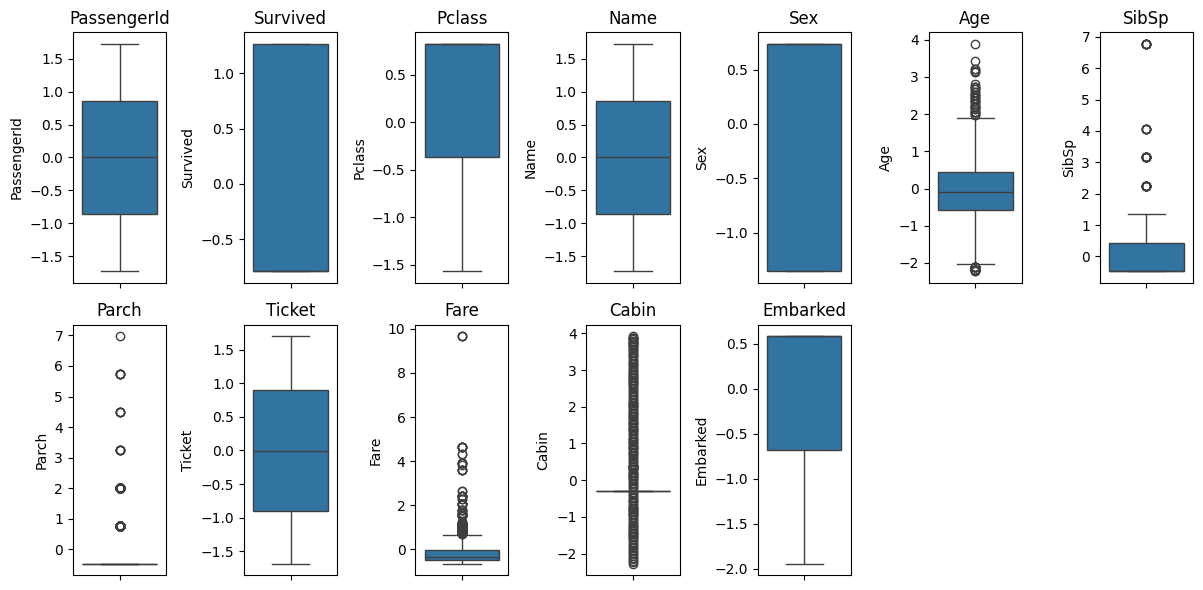

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 7: Remove Outliers (IQR Method)


In [ ]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

for col in num_cols:
    df = remove_outliers_iqr(df, col)

print("\nShape after Outlier Removal:", df.shape)


Shape after Outlier Removal: (491, 12)


In [ ]:
df.to_csv("/content/archive.zip", index=False)
print(" Cleaned dataset saved as titanic_cleaned.csv")

 Cleaned dataset saved as titanic_cleaned.csv
